<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Lab_1_PDI_Segmentaci%C3%B3n_arroz_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'> Bienvenido a su primer laboratorio </font>

**En este laboratorio aplicará una segmentación básica por umbral sobre dos imagenes distintas. Fíjese muy bien en las funciones ya que las utilizara recurrentemente dentro del curso**

# <font color='darkred'> Carga de una imágen desde Dropbox </font>

<font color='dimgray'>La siguiente línea de código utiliza el comando wget para descargar un archivo de internet. En este caso, el archivo que se descargará es "onerice.bmp" desde la URL "https://www.dropbox.com/s/jlhrh1else0wr5c/onerice.bmp".</font>

<font color='dimgray'>Una vez que se ejecute esta línea de código, el archivo "onerice.bmp" se descargará y estará disponible en el directorio actual donde se esté ejecutando el código.</font>

<font color='dimgray'>Esto lo usaremos en la mayoría de laboratorios.</font>

In [2]:
!wget https://www.dropbox.com/s/jlhrh1else0wr5c/onerice.bmp

--2023-07-25 14:57:37--  https://www.dropbox.com/s/jlhrh1else0wr5c/onerice.bmp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jlhrh1else0wr5c/onerice.bmp [following]
--2023-07-25 14:57:38--  https://www.dropbox.com/s/raw/jlhrh1else0wr5c/onerice.bmp
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69584aca8f48718b37f22e7ca4.dl.dropboxusercontent.com/cd/0/inline/CAhaOkoj8CxhikxCWArrqT6OsrQrHa6Tr4wAZGi-gtGRvdnChB8BfBcbIZrIOLjfX2Wes-ba-VrwawkUFSaumoFNKzZ0pf18XzVke7r81eH2UT2JFlDQenIliinZTJ9CZoklWcNzATpHnGra9hxc2Z4-RmaxMgm2BIXNAGTJMTxTpQ/file# [following]
--2023-07-25 14:57:38--  https://uc69584aca8f48718b37f22e7ca4.dl.dropboxusercontent.com/cd/0/inline/CAhaOkoj8CxhikxCWArrqT6OsrQrHa6Tr4wAZGi-gtGRvdnChB8BfBcbIZrIOLjfX2Wes-ba-VrwawkUFSa

# <font color='darkred'> Importación de Librerías

<font color='dimgray'>Estas líneas de código importan bibliotecas y módulos necesarios para trabajar con imágenes utilizando Python.

<font color='dimgray'>Estas importaciones son comunes al trabajar con imágenes en Python, ya que NumPy se utiliza para manipular los datos de la imagen, OpenCV para leer y procesar la imagen, y Matplotlib para mostrar la imagen o visualizar los resultados.

In [3]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt


# <font color='darkred'> Lectura y despliegue de la imagen




<font color='dimgray'> Este código carga la imagen desde el archivo "onerice.bmp" utilizando la función imread de OpenCV, la muestra utilizando imshow de Matplotlib y luego muestra la imagen en una ventana utilizando show.

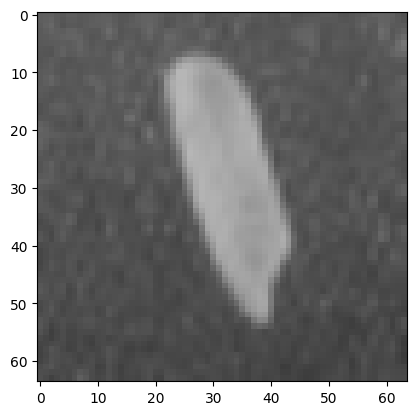

In [4]:
img = imread('onerice.bmp')
plt.imshow(img)
plt.show()

# <font color='darkred'> Función que nos dice cómo es la imagen

<font color='dimgray'> El código define la función comoes, que imprime información básica sobre una imagen, como su tamaño, el valor máximo de los píxeles y el valor mínimo de los píxeles. Luego, se llama a la función utilizando una imagen específica (img) para obtener la información de esa imagen.

In [5]:
def comoes(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

comoes(img)

size =  (64, 64, 3)
max  =  183
min  =  59


# <font color='darkred'> Selección del primer canal de la imagen

 Selecciona el primer canal de color de la imagen img para obtener una representación en escala de grises, muestra información sobre la imagen en escala de grises, muestra la imagen en escala de grises y luego la muestra en una ventana o en el entorno de visualización actual.

size =  (64, 64)
max  =  183
min  =  59


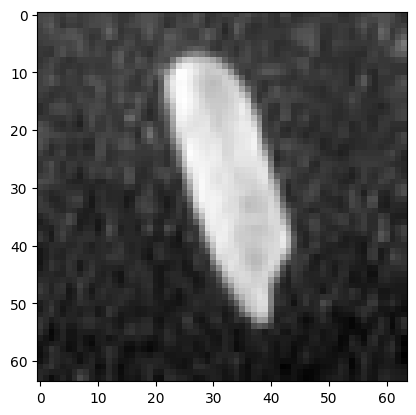

In [6]:
X = img[:,:,0]
comoes(X)
plt.imshow(X,cmap='gray')
plt.show()

# <font color='darkred'> Función de Segmentación por Umbral

Este código define una función llamada "segmenta" que toma una imagen en escala de grises X y un valor de umbral t. La función realiza un proceso de segmentación, donde los píxeles de la imagen que superan el umbral t se asignan al valor máximo (255) y los demás píxeles se asignan a cero. Además, imprime el área de la región segmentada y devuelve la imagen segmentada.

In [7]:
def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y


# <font color='darkred'> Segmentación

Segmenta la imagen en escala de grises X utilizando un umbral de 120 y asigna la imagen segmentada a la variable Y. Luego, muestra información sobre la imagen segmentada, muestra la imagen segmentada en una ventana o en el entorno de visualización actual.

area =  597
size =  (64, 64)
max  =  255.0
min  =  0.0


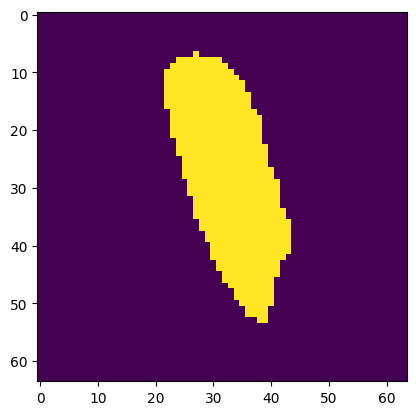

In [8]:
Y = segmenta(X,120) #un buen umbral es 120
comoes(Y)
plt.imshow(Y)
plt.show()

In [16]:
def calcula_centroide(Y):
  sum_x = 0
  sum_y = 0
  total_puntos = 0
  (N,M) = Y.shape
  for i in range(N):
    for j in range(M):
      if Y[i,j] == 255:
        sum_x = sum_x + i
        sum_y = sum_y + j
        total_puntos = total_puntos + 1
  centroid_x = sum_x / total_puntos
  centroid_y = sum_y / total_puntos
  return centroid_x, centroid_y

# Ahora, puedes llamar a esta función con tu imagen segmentada
cx, cy = calcula_centroide(Y)
print('El centroide de la imagen segmentada se encuentra en (', cx, ',', cy, ')')

El centroide de la imagen segmentada se encuentra en ( 28.299832495812396 , 32.70519262981575 )


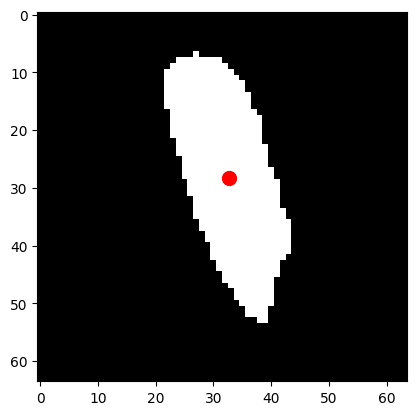

In [17]:
import matplotlib.patches as patches

def dibuja_centroide(img, centroide):
  fig, ax = plt.subplots(1)
  ax.imshow(img, cmap='gray')
  plt.scatter(centroide[1], centroide[0], c='r', s=100)  # Ponemos el círculo en el centroide
  plt.show()

# Ahora, puedes llamar a esta función con tu imagen y el centroide
dibuja_centroide(Y, (cx, cy))

# <font color='darkgreen'> Segunda parte: Un ejemplo más complejo

In [9]:
!wget https://www.dropbox.com/s/trcnlnrkoq9hcq3/rices.png

--2023-07-25 14:57:42--  https://www.dropbox.com/s/trcnlnrkoq9hcq3/rices.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/trcnlnrkoq9hcq3/rices.png [following]
--2023-07-25 14:57:42--  https://www.dropbox.com/s/raw/trcnlnrkoq9hcq3/rices.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc759f9697f7431c3d1640600ab6.dl.dropboxusercontent.com/cd/0/inline/CAjrO0QqjVQHM80IqF1hoLNJPJm7xHUDYx0MHW4ET4koc_zEwVFhrKNxDc5xJXnP-CNpUM2-j7g0B4exOGVeRvCoR_EKjuO0OvTgGR40Vx2zFQWZmaQThOniULbj3Jd8rmPKzufnojB0BMZJrWOV_07Fng9WDLIoiIYaK6A6CFalAA/file# [following]
--2023-07-25 14:57:43--  https://uc759f9697f7431c3d1640600ab6.dl.dropboxusercontent.com/cd/0/inline/CAjrO0QqjVQHM80IqF1hoLNJPJm7xHUDYx0MHW4ET4koc_zEwVFhrKNxDc5xJXnP-CNpUM2-j7g0B4exOGVeRvCoR

# <font color='darkgreen'> Cargar la imagen

Carga una imagen del archivo "rices.png", extrae un canal de color específico de la imagen, muestra información sobre ese canal de color, muestra el canal de color en escala de grises y luego muestra el canal de color en una ventana o en el entorno de visualización actual.

size =  (512, 512)
max  =  207
min  =  38


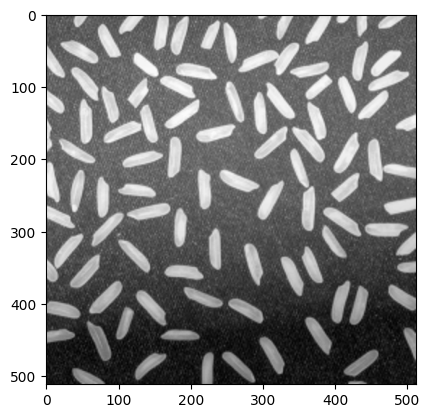

In [10]:
img2 = imread('rices.png')
plt.show()
R2= img2[:,:,0]
comoes(R2)
plt.imshow(R2,cmap='gray')
plt.show()

# <font color='darkgreen'> Como el fondo no tiene iluminación constante, entonces un umbral global para toda la imagen no funciona bien.

# <font color='red'> Debe probar con 90, 110, 130 y 150

area =  55395


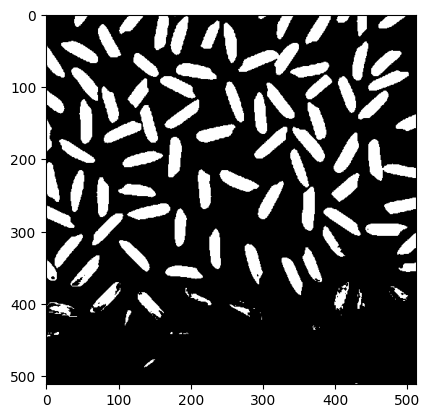

In [11]:
Y2 = segmenta(R2,150)
plt.imshow(Y2,cmap='gray')
plt.show()

# <font color='darkgreen'> Definición de imagen con fondo homogéneo

Obtiene las dimensiones de R2 y las asigna a las variables N y M.

Crea una nueva matriz Xm del mismo tamaño que R2 y realiza un ajuste del mínimo en cada fila de la matriz X mediante la resta del valor mínimo de cada fila.

Al restar el valor mínimo de cada fila, se desplazan los valores de los píxeles de manera que el valor mínimo de cada fila se convierte en cero. Esto puede ayudar a realzar detalles y estructuras en la imagen, especialmente cuando hay variaciones significativas en los valores de los píxeles a lo largo de las filas.

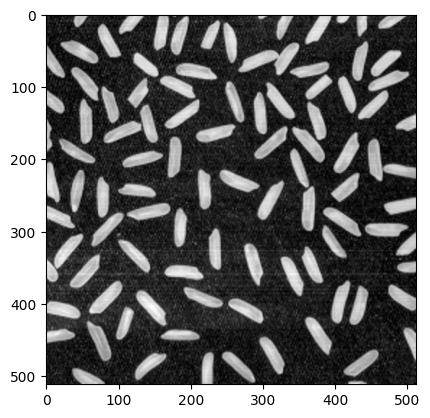

In [12]:
(N,M) = R2.shape
Xm = np.zeros((N,M),np.uint8)

for i in range(N):
  xmin = np.min(R2[i,:])
  Xm[i,:] = R2[i,:] - xmin

plt.imshow(Xm,cmap='gray')
plt.show()

# <font color='darkgreen'> Segmentación

area =  68445


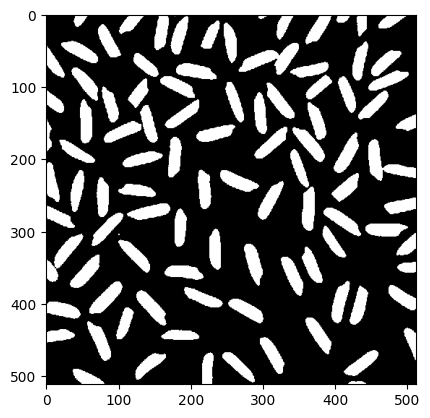

In [13]:
Y3 = segmenta(Xm,60)
plt.imshow(Y3,cmap='gray')
plt.show()

In [14]:
from skimage.measure import label

# Aplica la función de etiquetado a la imagen segmentada
labels = label(Y3)

# Cuenta el número de granos de arroz usando el número máximo de etiquetas
num_grains = labels.max()

print('Número de granos de arroz:', num_grains)

Número de granos de arroz: 100


# <font color='darkorange'> Tercera parte: Otro ejemplo - Rx


In [20]:
!wget https://www.dropbox.com/s/716xrhlus0z33f3/Rx1.jpg


--2023-07-25 15:22:57--  https://www.dropbox.com/s/716xrhlus0z33f3/Rx1.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/716xrhlus0z33f3/Rx1.jpg [following]
--2023-07-25 15:22:57--  https://www.dropbox.com/s/raw/716xrhlus0z33f3/Rx1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc180c2ec500db976bdfdb811158.dl.dropboxusercontent.com/cd/0/inline/CAiI-TjAZ8HzmQKD_fNRBRWBf6wsOJPneMfdbyZQRVXKz_14Q4YAIZTuYnEh78oLpYYhH6w-4AOXT5XdEi7W4_ms8lkbB4oSHN2qlyK1bkZA9YE7zhZIUYaJjKr5ld_T52MUtnrnKwtkvcF0SRoZRqGwTfbMwzBF_nN20nIIgVGbdQ/file# [following]
--2023-07-25 15:22:58--  https://uc180c2ec500db976bdfdb811158.dl.dropboxusercontent.com/cd/0/inline/CAiI-TjAZ8HzmQKD_fNRBRWBf6wsOJPneMfdbyZQRVXKz_14Q4YAIZTuYnEh78oLpYYhH6w-4AOXT5XdEi7W4_ms8lkbB4o

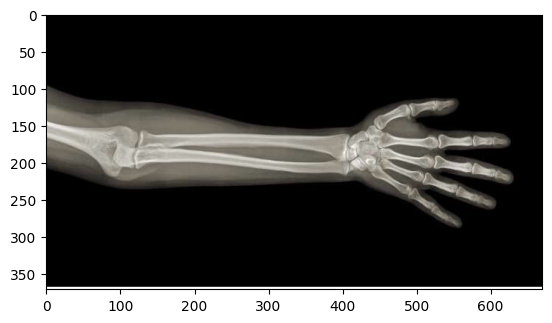

size =  (371, 670)
max  =  255
min  =  0


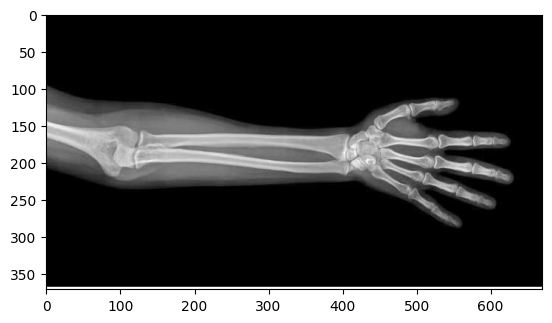

In [21]:
img3 = imread('Rx1.jpg')
plt.imshow(img3)
plt.show()

# Suponemos que también quieres trabajar con el canal rojo de la imagen
R3= img3[:,:,0]
comoes(R3)
plt.imshow(R3,cmap='gray')
plt.show()

area =  33437


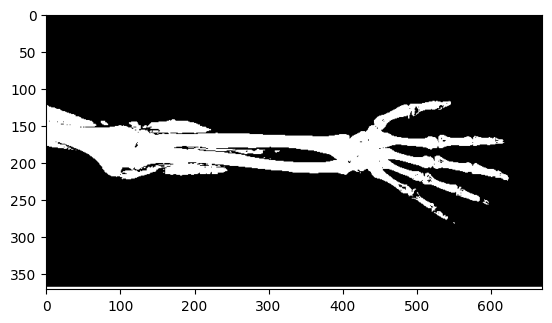

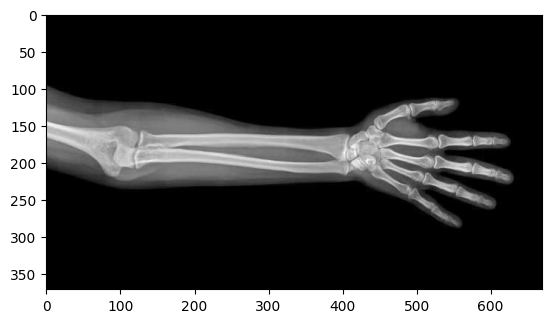

area =  52351


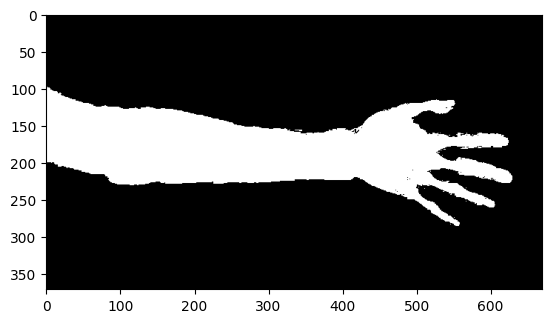

In [22]:
# Aplica la segmentación con un umbral que debes definir de acuerdo a esta nueva imagen
# He dejado el valor de 150 como ejemplo, pero puedes ajustarlo según las características de la imagen
Y3 = segmenta(R3,120)
plt.imshow(Y3,cmap='gray')
plt.show()

# De nuevo, asumimos que quieres restar el mínimo de cada fila a esa fila.
(N,M) = R3.shape
Xm = np.zeros((N,M),np.uint8)

for i in range(N):
  xmin = np.min(R3[i,:])
  Xm[i,:] = R3[i,:] - xmin

plt.imshow(Xm,cmap='gray')
plt.show()

# Finalmente, volvemos a segmentar la imagen después de restar los mínimos
Y4 = segmenta(Xm,60)
plt.imshow(Y4,cmap='gray')
plt.show()